In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#form sklearn.ensemble import RandomForestRegressor

df= pd.read_csv("DATA_CSV/india_2000_2024_daily_weather.csv")
df.head()


,city,date,temperature_2m_max,temperature_2m_min,apparent_temperature_max,apparent_temperature_min,precipitation_sum,rain_sum,weather_code,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant
0,Delhi,2000-01-01,19.9,7.4,19.2,5.8,0.0,0.0,0,10.9,13.3,58
1,Delhi,2000-01-02,20.0,5.5,18.9,3.4,0.0,0.0,3,9.5,14.8,326
2,Delhi,2000-01-03,20.1,6.3,18.2,4.3,0.0,0.0,0,10.0,23.8,309
3,Delhi,2000-01-04,19.8,6.4,18.5,4.2,0.0,0.0,0,8.6,18.7,311
4,Delhi,2000-01-05,19.4,5.3,17.7,3.2,0.0,0.0,0,9.4,20.2,322


In [84]:
df.shape
print(df.describe)

<bound method NDFrame.describe of           city        date  temperature_2m_max  temperature_2m_min  \
0        Delhi  2000-01-01                19.9                 7.4   
1        Delhi  2000-01-02                20.0                 5.5   
2        Delhi  2000-01-03                20.1                 6.3   
3        Delhi  2000-01-04                19.8                 6.4   
4        Delhi  2000-01-05                19.4                 5.3   
...        ...         ...                 ...                 ...   
91315  Lucknow  2024-12-27                25.6                13.9   
91316  Lucknow  2024-12-28                22.4                15.9   
91317  Lucknow  2024-12-29                22.8                13.5   
91318  Lucknow  2024-12-30                20.8                12.4   
91319  Lucknow  2024-12-31                18.3                 9.4   

       apparent_temperature_max  apparent_temperature_min  precipitation_sum  \
0                          19.2              

In [85]:
df.isnull().values.any()
df.isnull().sum()

city                           0
date                           0
temperature_2m_max             0
temperature_2m_min             0
apparent_temperature_max       0
apparent_temperature_min       0
precipitation_sum              0
rain_sum                       0
weather_code                   0
wind_speed_10m_max             0
wind_gusts_10m_max             0
wind_direction_10m_dominant    0
dtype: int64

In [86]:
df['date']=pd.to_datetime(df['date'])
df = df.sort_values(['city','date'])

In [124]:
df['target_temp_max'] = df.groupby('city')['temperature_2m_max'].shift(-1)

In [125]:
feature_cols = [
    'temperature_2m_max','temperature_2m_min',
    'apparent_temperature_max','apparent_temperature_min',
    'precipitation_sum','rain_sum','weather_code',
    'wind_speed_10m_max','wind_gusts_10m_max','wind_direction_10m_dominant'
]


x = df[feature_cols]
y = df['target_temp_max']
mask = ~np.isnan(y)
x = x[mask]
y = y[mask]



In [126]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.3,random_state=42)

In [127]:
print("X_Train:",x_train.shape)
print("Y_Train:",y_train.shape)
print("X_Test:",x_test.shape)
print("y_Test:",y_test.shape)

X_Train: (63917, 10)
Y_Train: (63917,)
X_Test: (27393, 10)
y_Test: (27393,)


In [128]:
# Ridge 

ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(x_train, y_train)
L2 = ridge_model.score(x_test, y_test)
print("Ridge R²:", L2)

Ridge R²: 0.93125464531688


In [129]:
# Lasso 

lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
L1=lasso_model.fit(x_train, y_train)
L1 = lasso_model.score(x_test, y_test)
print("Lasso R²:", L1)

Lasso R²: 0.9297880719033058


In [130]:
# ElasticNet

elastic_model = make_pipeline(StandardScaler(), ElasticNet(alpha=0.1, l1_ratio=0.5))
elastic_model.fit(x_train, y_train)
NetEls = elastic_model.score(x_test, y_test)
print("ElasticNet R²:", NetEls)

ElasticNet R²: 0.9248800080536557


In [131]:
new_data = pd.DataFrame([{
    'temperature_2m_max': 33,
    'temperature_2m_min': 26,
    'apparent_temperature_max': 35,
    'apparent_temperature_min': 27,
    'precipitation_sum': 0,
    'rain_sum': 0,
    'weather_code': 10,  # already numeric code
    'wind_speed_10m_max': 10,
    'wind_gusts_10m_max': 15,
    'wind_direction_10m_dominant': 180
}])



In [132]:
L1_pred = lasso_model.predict(new_data)[0]
L2_pred =  ridge_model.predict(new_data)[0]
Netels_pred =  elastic_model.predict(new_data)[0]
print("Ridge prediction:",L2_pred)
print("Lasso prediction:", L1_pred)
print("ElasticNet prediction:",Netels_pred)

Ridge prediction: 33.34622864740144
Lasso prediction: 32.88727998580486
ElasticNet prediction: 32.91539197949194


In [133]:

models = {
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "ElasticNet": elastic_model
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    r2 = model.score(x_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} -> R²: {r2:.3f},RMSE: {rmse:.3f}")


Ridge -> R²: 0.931,RMSE: 1.246
Lasso -> R²: 0.930,RMSE: 1.259
ElasticNet -> R²: 0.925,RMSE: 1.302


In [134]:
y_class = (y > 30).astype(int)  # binary classification
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size=0.3, random_state=42)
clf = make_pipeline(StandardScaler(), LogisticRegression())
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9209287044135364

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     12133
           1       0.93      0.93      0.93     15260

    accuracy                           0.92     27393
   macro avg       0.92      0.92      0.92     27393
weighted avg       0.92      0.92      0.92     27393


Confusion Matrix:
 [[11024  1109]
 [ 1057 14203]]


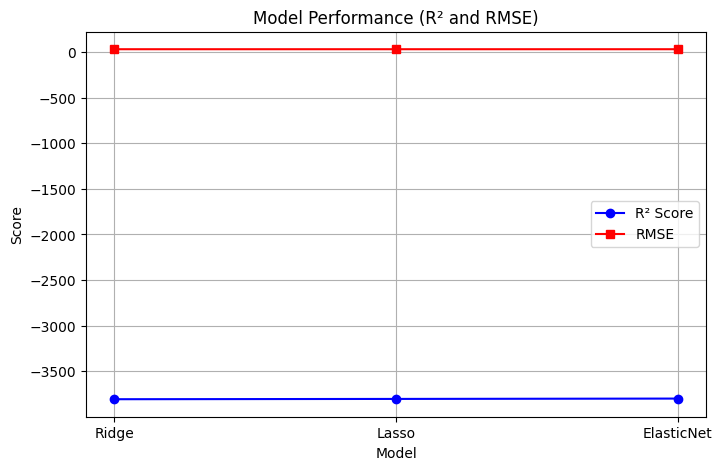

In [117]:

model_names = ["Ridge", "Lasso", "ElasticNet"]

r2_scores = []
rmse_scores = []

for name, model in zip(model_names, [ridge_model, lasso_model, elastic_model]):
    y_pred = model.predict(x_test)
    r2 = model.score(x_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2)
    rmse_scores.append(rmse)

plt.figure(figsize=(8,5))
plt.plot(model_names, r2_scores, marker='o', label='R² Score', color='blue')
plt.plot(model_names, rmse_scores, marker='s', label='RMSE', color='red')
plt.title("Model Performance (R² and RMSE)")
plt.xlabel("Model")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


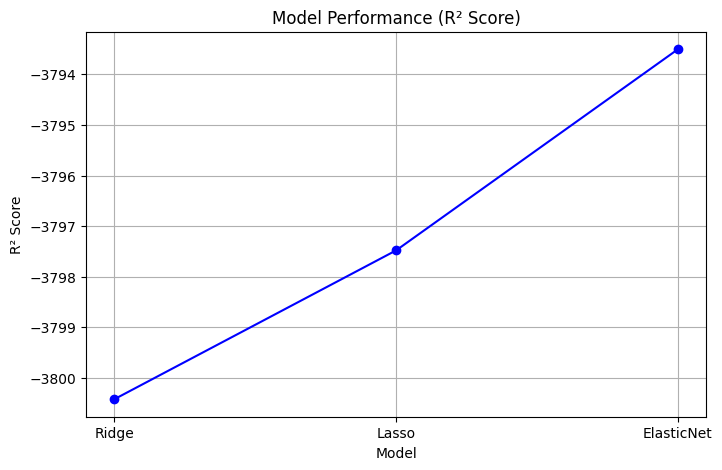

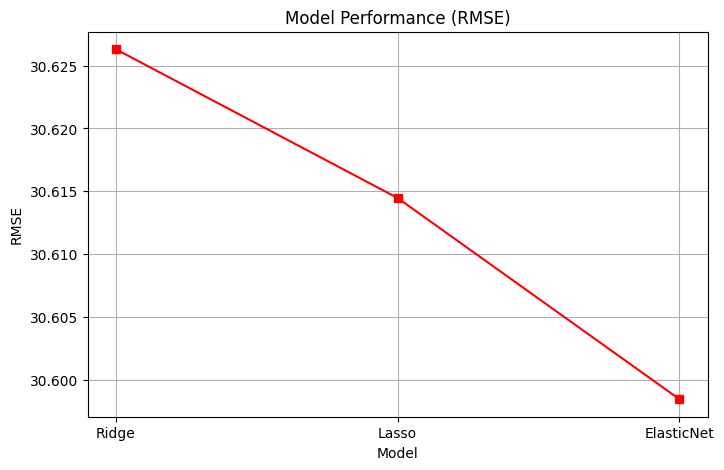

In [135]:

model_names = ["Ridge", "Lasso", "ElasticNet"]
r2_scores = []
rmse_scores = []

for name, model in zip(model_names, [ridge_model, lasso_model, elastic_model]):
    y_pred = model.predict(x_test)
    r2 = model.score(x_test, y_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2)
    rmse_scores.append(rmse)

# Line chart for R²
plt.figure(figsize=(8,5))
plt.plot(model_names, r2_scores, marker='o', color='blue')
plt.title("Model Performance (R² Score)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()

# Line chart for RMSE
plt.figure(figsize=(8,5))
plt.plot(model_names, rmse_scores, marker='s', color='red')
plt.title("Model Performance (RMSE)")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()
